# Cartpole system control using RL

In [1]:
import gym
import numpy as np
import math, random

In [2]:

env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()


[ 0.0189046  -0.0352893   0.02074288  0.03195939]
[ 0.01819882 -0.23070247  0.02138207  0.33111408]
[ 0.01358477 -0.03589131  0.02800435  0.04524997]
[ 0.01286694 -0.23140341  0.02890935  0.3466353 ]
[ 0.00823887 -0.03670434  0.03584206  0.06320692]
[ 0.00750479  0.15788588  0.0371062  -0.21795563]
[ 0.0106625   0.3524583   0.03274708 -0.49870664]
[ 0.01771167  0.15689032  0.02277295 -0.19588602]
[ 0.02084948 -0.03854986  0.01885523  0.10389289]
[ 0.02007848 -0.23393688  0.02093309  0.40246442]
[ 0.01539974 -0.42934936  0.02898238  0.70167285]
[ 0.00681275 -0.6248608   0.04301583  1.0033364 ]
[-0.00568446 -0.8205302   0.06308256  1.3092119 ]
[-0.02209507 -1.0163921   0.0892668   1.6209543 ]
[-0.04242291 -1.2124449   0.12168588  1.9400722 ]
[-0.0666718  -1.4086376   0.16048732  2.2678723 ]
[-0.09484456 -1.6048534   0.20584477  2.6053948 ]
Episode finished after 17 timesteps
[ 0.04615264 -0.02393366 -0.01019966 -0.0042854 ]
[ 0.04567396  0.17133307 -0.01028537 -0.3001689 ]
[ 0.04910062 -

# Again opening the gym environment

In [ ]:
env = gym.make('CartPole-v0')

# Printing the action spaces
print(env.action_space)

# Observation space
print(env.observation_space)

# Description of the system:

1. Discrete - possible action actions - here sway left or right
2. Box - dimension space

Modelled from Sutton's book, the environment consists of:
|`index`|Environment Action|Min|Max|
|---|---|---|-----|
|0|Cart-Position|-2.4 |2.4 |
|1|Cart-Velocity|$-\infty$ |$\infty$ |
|2|Pole Angle|-41.8° | 41.8°|
|3|Pole Velocity at tip|$-\infty$ |$\infty$ |

The action space consists of:
0 - Move left
1 - Move right

Episode termination:
1. When the 


In [ ]:
# High and low values - assume second and fourth values as infinity
print(env.observation_space.high)
print(env.observation_space.low)
env.close()

## Play it yourself (human policy)

Code taken from [here]('https://scientific-python.readthedocs.io/en/latest/notebooks_rst/6_Machine_Learning/04_Exercices/02_Practical_Work/02_RL_1_CartPole.html)

In [3]:
from pyglet.window import key
import matplotlib.pyplot as plt
import time

bool_do_not_quit = True  # Boolean to quit pyglet
scores = []  # Your gaming score
a = 0  # Action


def key_press(k, mod):
    global bool_do_not_quit, a, restart
    if k == 0xff0d:
        restart = True
    if k == key.ESCAPE:
        bool_do_not_quit = False  # Added to Quit
    if k == key.Q:
        bool_do_not_quit = False  # Added to Quit
    if k == key.LEFT:
        a = 0  # 0     Push cart to the left
    if k == key.RIGHT:
        a = 1  # 1     Push cart to the right


def run_cartPole_asHuman(policy=None, record_video=False):
    env = gym.make('CartPole-v0')

    env.reset()
    env.render()
    if record_video:
        env.monitor.start('/tmp/video-test', force=True)
    env.viewer.window.on_key_press = key_press

    while bool_do_not_quit:
        env.reset()
        total_reward = 0.0
        steps = 0
        restart = False
        t1 = time.time()  # Trial timer
        while bool_do_not_quit:
            s, r, done, info = env.step(a)
            time.sleep(1/10)  # 10fps: Super slow for us poor little human!
            total_reward += r
            steps += 1
            # Faster, but you can as well call env.render() every time to play full window.
            if not record_video:
                env.render()
            if done or restart:
                t1 = time.time()-t1
                scores.append(total_reward)
                print("Trial", len(scores), "| Score:", total_reward,
                      '|', steps, "steps | %0.2fs." % t1)
                break
    env.close()


run_cartPole_asHuman()  # Run with human keyboard input


Trial 1 | Score: 10.0 | 10 steps | 1.21s.
Trial 2 | Score: 25.0 | 25 steps | 2.98s.
Trial 3 | Score: 15.0 | 15 steps | 1.82s.
Trial 4 | Score: 15.0 | 15 steps | 1.78s.
Trial 5 | Score: 16.0 | 16 steps | 1.86s.


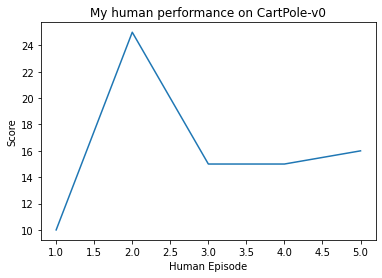

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot your score
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.title('My human performance on CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Human Episode')
plt.show()
